# Predictions on the Raisin dataset using the Random Forest Model:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel('Raisin_Dataset.xlsx', sheet_name = 'Raisin_Dataset')

In [4]:
dataset.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [5]:
dataset.shape

(900, 8)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [7]:
dataset.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


### Converting raisin class values to 0 and 1:

In [8]:
dataset['Class'] = dataset['Class'].str.replace('Kecimen', '0')
dataset['Class'] = dataset['Class'].str.replace('Besni', '1')

cols = dataset.columns
dataset[cols] = dataset[cols].apply(pd.to_numeric, errors='coerce')

In [9]:
data_copy = dataset.copy()
y_data = data_copy.pop('Class').to_numpy()
X_data = data_copy.to_numpy()

### Checking the class values:

In [10]:
dataset['Class'].value_counts()

0    450
1    450
Name: Class, dtype: int64

In [11]:
dataset.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

## Univariate Analysis:

#### Area:

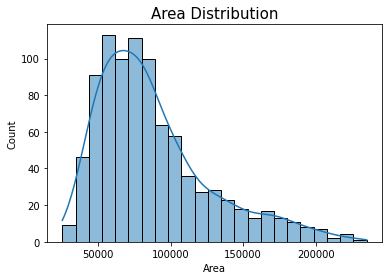

In [12]:
sns.histplot(data=dataset, x='Area', kde=True)
plt.title('Area Distribution',fontsize=15)
plt.show()

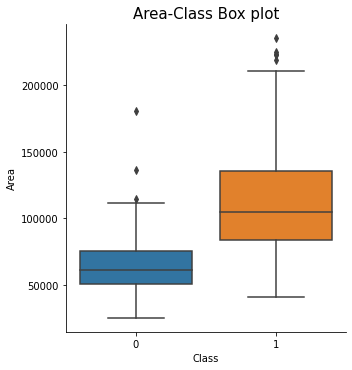

In [13]:
sns.catplot(data=dataset, x='Class', y='Area', kind='box')
plt.title("Area-Class Box plot",fontsize=15)
plt.show()

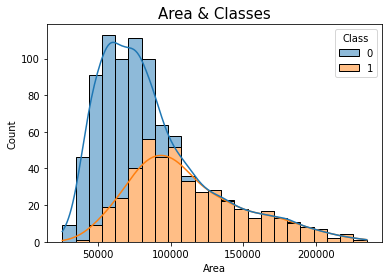

In [14]:
sns.histplot(data=dataset,x='Area',hue='Class',kde=True,multiple='stack')
plt.title('Area & Classes',fontsize=15)
plt.show()

#### MajorAxisLength:

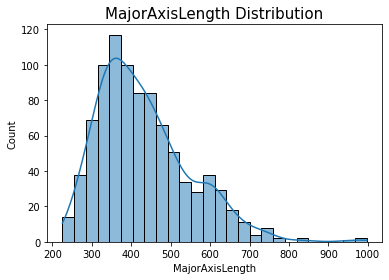

In [15]:
sns.histplot(data=dataset,x='MajorAxisLength', kde=True)
plt.title('MajorAxisLength Distribution',fontsize=15)
plt.show()

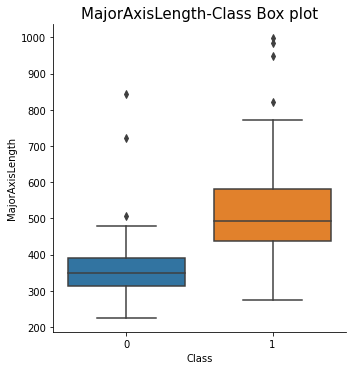

In [16]:
sns.catplot(data=dataset,x='Class', y='MajorAxisLength', kind='box')
plt.title("MajorAxisLength-Class Box plot",fontsize=15)
plt.show()

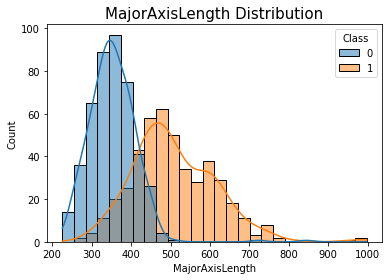

In [17]:
sns.histplot(data=dataset,x='MajorAxisLength',hue='Class',kde=True,multiple='layer')
plt.title('MajorAxisLength Distribution',fontsize=15)
plt.show()

#### MinorAxisLength:

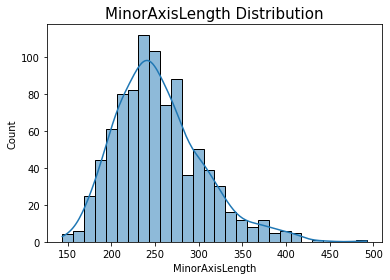

In [18]:
sns.histplot(data=dataset,x='MinorAxisLength',kde=True)
plt.title('MinorAxisLength Distribution',fontsize=15)
plt.show()

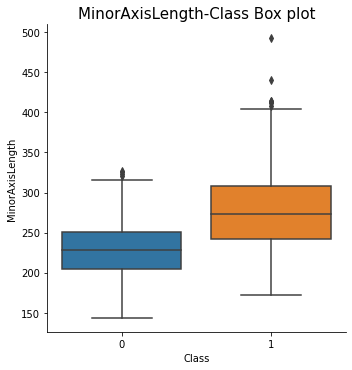

In [25]:
sns.catplot(data=dataset,x='Class',y='MinorAxisLength', kind='box')
plt.title("MinorAxisLength-Class Box plot",fontsize=15)
plt.show()

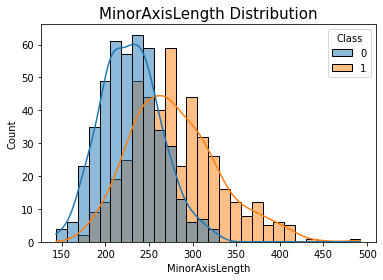

In [20]:
sns.histplot(data=dataset,x='MinorAxisLength', hue='Class', kde=True, multiple='layer')
plt.title('MinorAxisLength Distribution',fontsize=15)
plt.show()

#### Eccentricity:

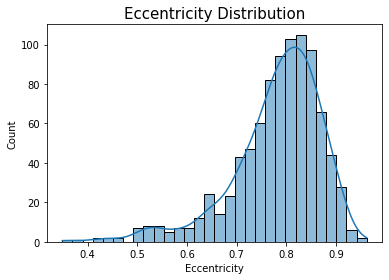

In [21]:
sns.histplot(data=dataset,x='Eccentricity',kde=True)
plt.title('Eccentricity Distribution',fontsize=15)
plt.show()

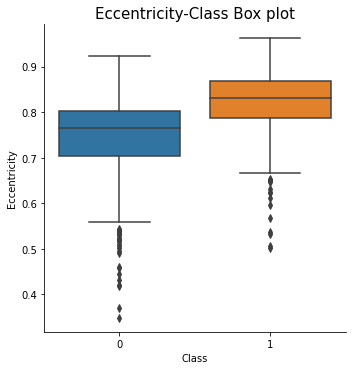

In [22]:
sns.catplot(data=dataset,x='Class',y='Eccentricity',kind='box')
plt.title("Eccentricity-Class Box plot",fontsize=15)
plt.show()

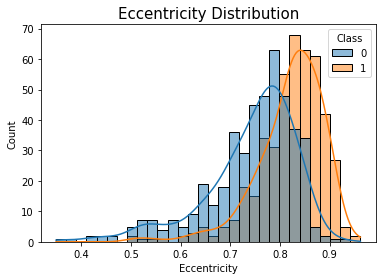

In [23]:
sns.histplot(data=dataset,x='Eccentricity',hue='Class',kde=True,multiple='layer')
plt.title('Eccentricity Distribution',fontsize=15)
plt.show()

#### ConvexArea:

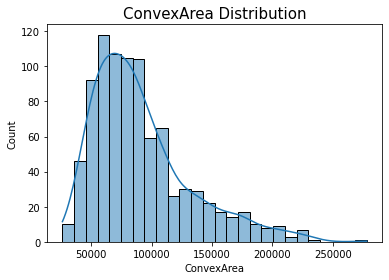

In [26]:
sns.histplot(data=dataset,x='ConvexArea',kde=True)
plt.title('ConvexArea Distribution',fontsize=15)
plt.show()

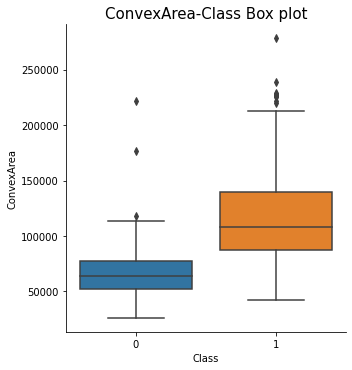

In [27]:
sns.catplot(data=dataset, x='Class', y='ConvexArea', kind='box')
plt.title("ConvexArea-Class Box plot",fontsize=15)
plt.show()

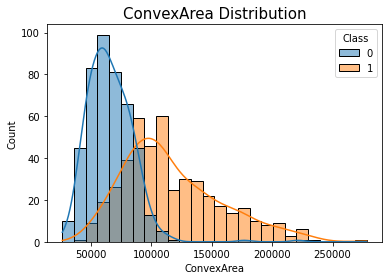

In [28]:
sns.histplot(
    data=dataset,
    x='ConvexArea',
    hue='Class',
    kde=True,
    multiple='layer'
)
plt.title('ConvexArea Distribution',fontsize=15)
plt.show()

#### Extent

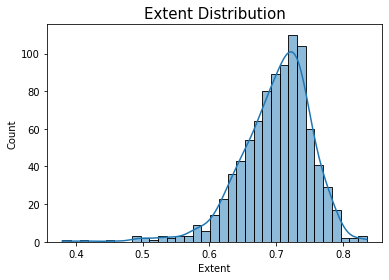

In [29]:
sns.histplot(
    data=dataset,
    x='Extent',
    kde=True
)
plt.title('Extent Distribution',fontsize=15)
plt.show()

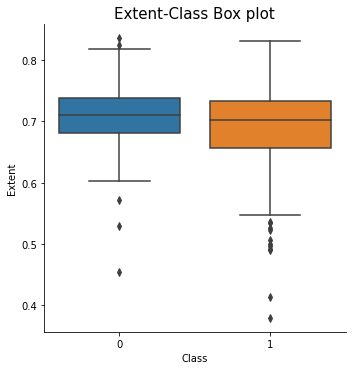

In [30]:
sns.catplot(
    data=dataset,
    x='Class',
    y='Extent',
    kind='box',
)
plt.title("Extent-Class Box plot",fontsize=15)
plt.show()

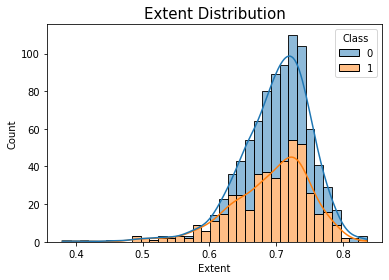

In [31]:
sns.histplot(
    data=dataset,
    x='Extent',
    hue='Class',
    kde=True,
    multiple='stack'
)
plt.title('Extent Distribution',fontsize=15)
plt.show()

#### Perimeter

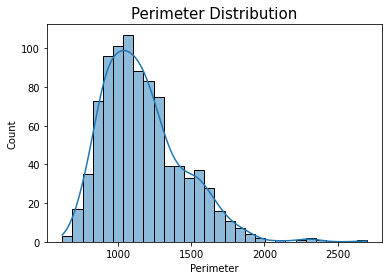

In [32]:
sns.histplot(
    data=dataset,
    x='Perimeter',
    kde=True
)
plt.title('Perimeter Distribution',fontsize=15)
plt.show()

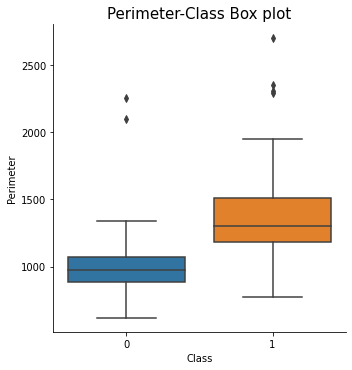

In [33]:
sns.catplot(
    data=dataset,
    x='Class',
    y='Perimeter',
    kind='box',
)
plt.title("Perimeter-Class Box plot",fontsize=15)
plt.show()

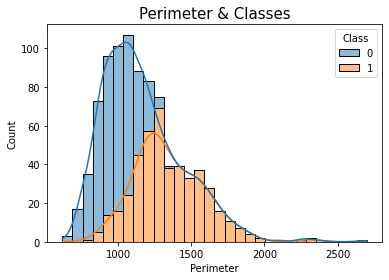

In [34]:
sns.histplot(
    data=dataset,
    x='Perimeter',
    hue='Class',
    kde=True,
    multiple='stack'
)
plt.title('Perimeter & Classes',fontsize=15)
plt.show()

### Correlation via heatmap:

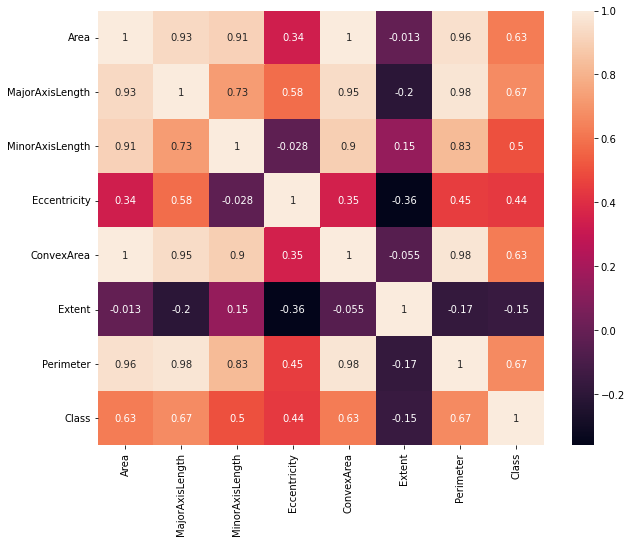

In [35]:
Corr = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(Corr, annot=True)
plt.show()

### Area vs Perimeter :

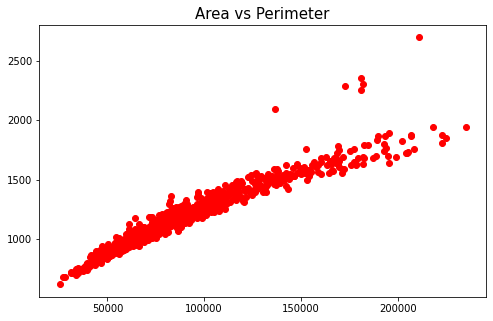

In [36]:
plt.figure(figsize=(8,5))
plt.title("Area vs Perimeter",fontsize=15)
plt.scatter(dataset.Area, dataset.Perimeter,color='r')
plt.show()

This shows a strong correlation between the area and perimeter of the raisins.

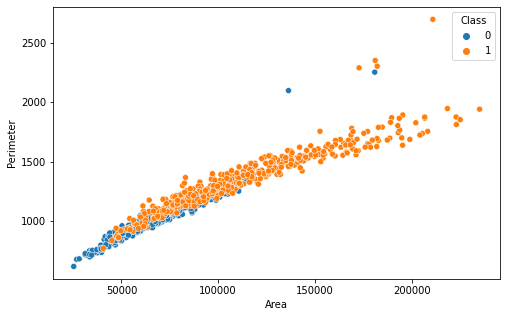

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot( data=dataset,x='Area', y='Perimeter', hue='Class')
plt.show()

The classses are also sperable (a little), higher the Area and Perimeter values the class is more likely to be Besin. This confirms the Box Plot and Histogram(+Density) Plot relation we observed in the starting.

### Area vs Axis  (0.91−0.93):

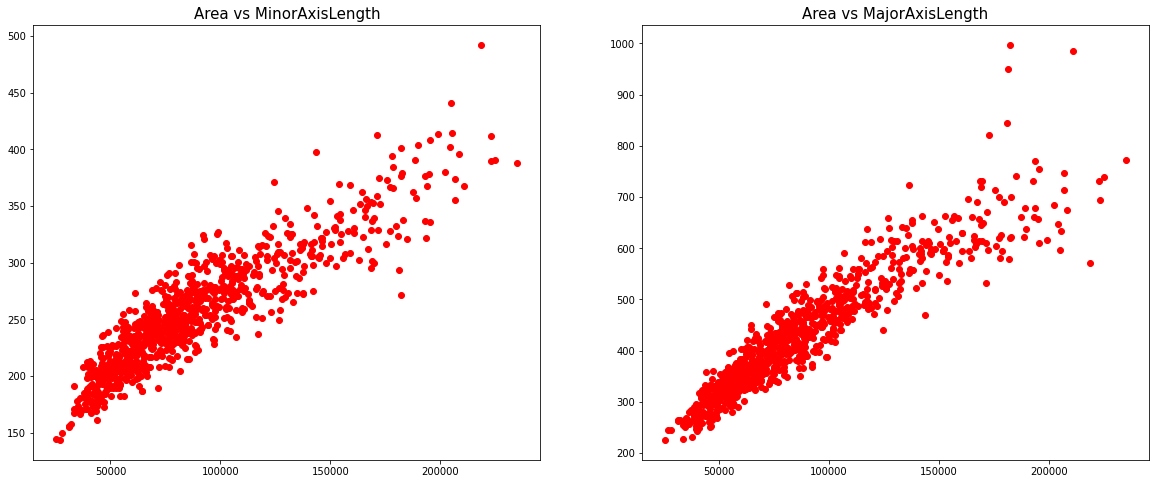

In [38]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Area vs MinorAxisLength",fontsize=15)
plt.scatter(dataset.Area, dataset.MinorAxisLength,color='r')


plt.subplot(1,2,2)
plt.title("Area vs MajorAxisLength",fontsize=15)
plt.scatter(dataset.Area, dataset.MajorAxisLength,color='r')
plt.show()

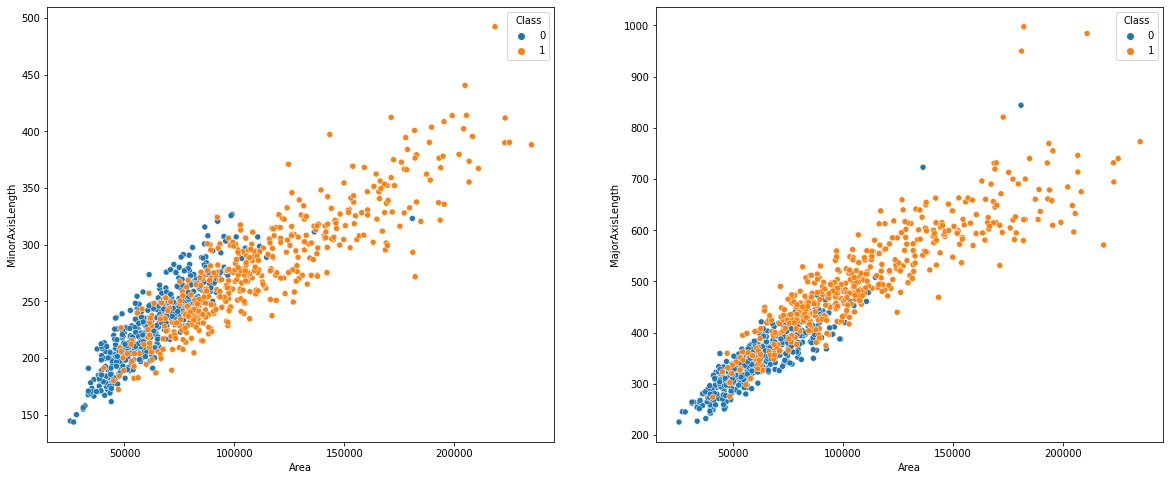

In [39]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(data=dataset, x='Area', y='MinorAxisLength', hue='Class',)
plt.subplot(1,2,2)
sns.scatterplot(data=dataset, x='Area', y='MajorAxisLength', hue='Class',)
plt.show()

### MajorAxis vs Perimeter  (0.98):

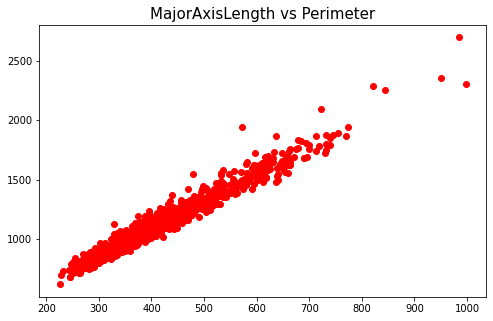

In [40]:
plt.figure(figsize=(8,5))
plt.title("MajorAxisLength vs Perimeter",fontsize=15)
plt.scatter(dataset.MajorAxisLength, dataset.Perimeter,color='r')
plt.show()

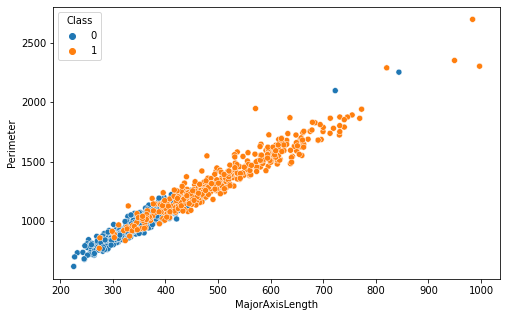

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=dataset,x='MajorAxisLength',y='Perimeter',hue='Class')
plt.show()

### MajorAxis vs ConvexArea  (0.95):

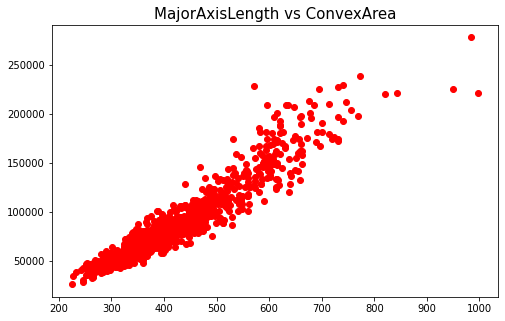

In [42]:
plt.figure(figsize=(8,5))
plt.title("MajorAxisLength vs ConvexArea",fontsize=15)
plt.scatter(dataset.MajorAxisLength, dataset.ConvexArea,color='r')
plt.show()

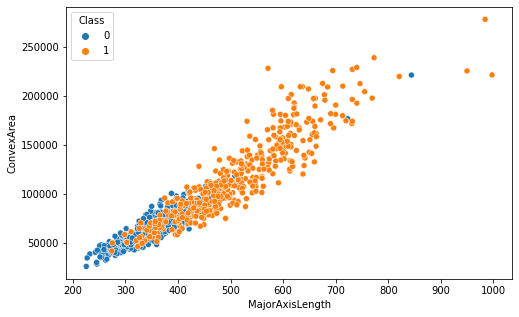

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=dataset, x='MajorAxisLength', y='ConvexArea', hue='Class')
plt.show()

### MajorAxis vs MinorAxis  (0.73):

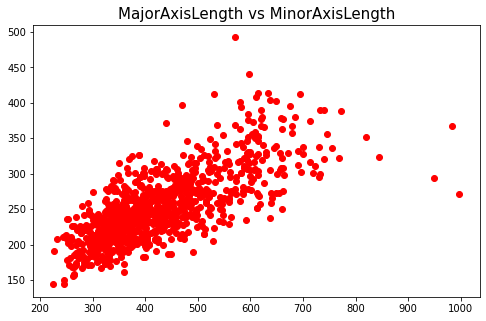

In [44]:
plt.figure(figsize=(8,5))
plt.title("MajorAxisLength vs MinorAxisLength",fontsize=15)
plt.scatter(dataset.MajorAxisLength, dataset.MinorAxisLength,color='r')
plt.show()

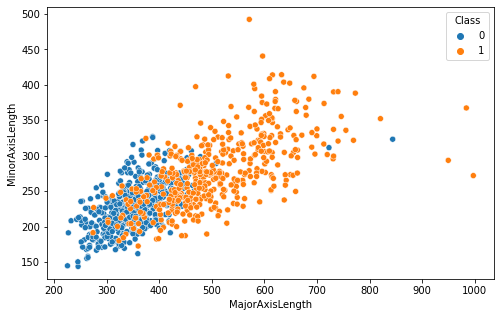

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=dataset,x='MajorAxisLength',y='MinorAxisLength',hue='Class')
plt.show()

### MinorAxisLength vs Perimeter  (0.83):

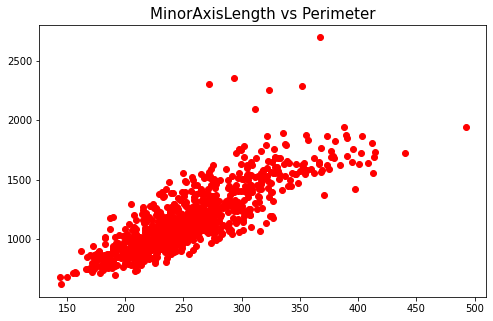

In [46]:
plt.figure(figsize=(8,5))
plt.title("MinorAxisLength vs Perimeter",fontsize=15)
plt.scatter(dataset.MinorAxisLength, dataset.Perimeter,color='r')
plt.show()

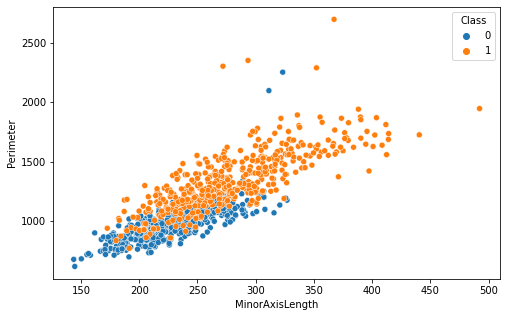

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot( data=dataset,x='MinorAxisLength',y='Perimeter',hue='Class')
plt.show()

### MinorAxisLength vs ConvexArea  (0.9):

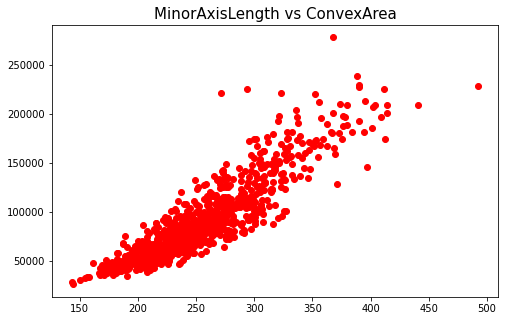

In [48]:
plt.figure(figsize=(8,5))
plt.title("MinorAxisLength vs ConvexArea",fontsize=15)
plt.scatter(dataset.MinorAxisLength, dataset.ConvexArea,color='r')
plt.show()

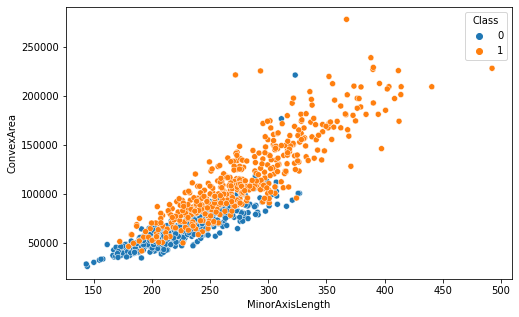

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=dataset,x='MinorAxisLength',y='ConvexArea',hue='Class')
plt.show()

### ConvexArea vs Perimeter  (0.98):

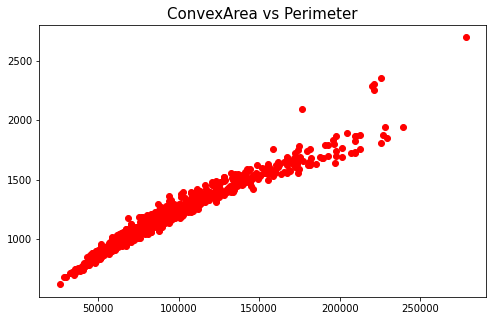

In [50]:
plt.figure(figsize=(8,5))
plt.title("ConvexArea vs Perimeter",fontsize=15)
plt.scatter(dataset.ConvexArea, dataset.Perimeter,color='r')
plt.show()

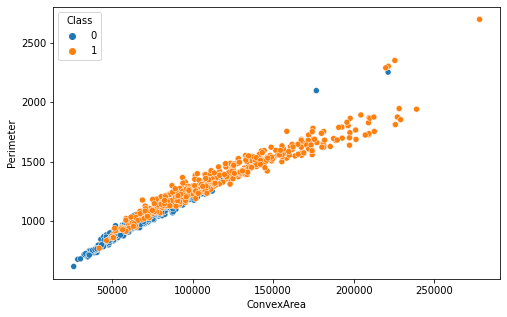

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot( data=dataset, x='ConvexArea', y='Perimeter', hue='Class')
plt.show()

All other relation were less that 70% and the negative relations weren't that strong to be worth to be visualized.

## Data Scaling :

In [52]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
dataset['MinorAxisLength'] = mms.fit_transform(dataset[['MinorAxisLength']])
dataset['Eccentricity'] = mms.fit_transform(dataset[['Eccentricity']])
dataset['Perimeter'] = mms.fit_transform(dataset[['Perimeter']])

# Standardization
dataset['Area'] = ss.fit_transform(dataset[['Area']])
dataset['MajorAxisLength'] = ss.fit_transform(dataset[['MajorAxisLength']])
dataset['ConvexArea'] = ss.fit_transform(dataset[['ConvexArea']])
dataset['Extent'] = ss.fit_transform(dataset[['Extent']])
dataset.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,-0.007186,0.097577,0.314376,0.767872,-0.015709,1.106743,0.271791,0
1,-0.324217,-0.209012,0.284945,0.738636,-0.304248,-0.287777,0.241842,0
2,0.078292,0.097758,0.351778,0.733009,0.062113,-1.158250,0.283594,0
3,-1.074286,-1.245051,0.186620,0.548194,-1.076165,0.001711,0.108284,0
4,-0.215393,-0.678958,0.422064,0.350968,-0.238623,1.745259,0.218493,0


## Train Test Split:

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2)

## Model Building:

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [56]:
rfc2 = RandomForestClassifier()

In [57]:
rfc2.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
y_pred_test = rfc2.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred_test)

0.8666666666666667

In [91]:
randmf = RandomForestClassifier(n_estimators = 7, min_samples_split = 10, min_samples_leaf= 5, max_features = 'auto', max_depth= 67, bootstrap=True)
randmf.fit( X_train, y_train)

RandomForestClassifier(max_depth=67, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=7)

In [92]:
y_pred_test_exp = randmf.predict(X_test)

In [93]:
accuracy_score(y_test, y_pred_test_exp)

0.8722222222222222